In this tutorial I will be using Naivebayes Classifier for classification of wine data before that I transform the data using PCA for reducing the variable

In [3]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [5]:
data = pd.read_csv(url, sep =";")

In [6]:
data.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

In [7]:
X = data[data.columns[[range(11)]]] #selecting the first 11 cols

In [8]:
y = data.quality

In [28]:
y.value_counts() # different quality types

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
#standardazing 
X = preprocessing.StandardScaler().fit(X).transform(X)

In [10]:
model = PCA()
fit = model.fit(X)
Z = fit.transform(X)

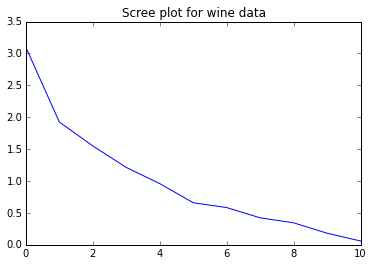

array([ 0.28173931,  0.1750827 ,  0.1409585 ,  0.11029387,  0.08720837,
        0.05996439,  0.05307193,  0.03845061,  0.0313311 ,  0.01648483,
        0.00541439])

In [15]:
%matplotlib inline
plt.plot(fit.explained_variance_)
plt.title("Scree plot for wine data")
plt.show()
fit.explained_variance_ratio_

From the above scree plot we can see that  5 components were able to explain ~78% of the variance in the data

In [21]:
pd.DataFrame(fit.components_,columns= list(data.columns[[range(11)]]))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.489314,-0.238584,0.463632,0.146107,0.212247,-0.036158,0.023575,0.395353,-0.438520,0.242921,-0.113232
1,-0.110503,0.274930,-0.151791,0.272080,0.148052,0.513567,0.569487,0.233575,0.006711,-0.037554,-0.386181
2,0.123302,0.449963,-0.238247,-0.101283,0.092614,-0.428793,-0.322415,0.338871,-0.057697,-0.279786,-0.471673
3,-0.229617,0.078960,-0.079418,-0.372793,0.666195,-0.043538,-0.034577,-0.174500,-0.003788,0.550872,-0.122181
4,0.082614,-0.218735,0.058573,-0.732144,-0.246501,0.159152,0.222465,-0.157077,-0.267530,-0.225962,-0.350681
5,-0.101479,-0.411449,-0.069593,-0.049156,-0.304339,0.014000,-0.136308,0.391152,0.522116,0.381263,-0.361645
6,0.350227,0.533735,-0.105497,-0.290663,-0.370413,0.116596,0.093662,0.170481,0.025138,0.447469,0.327651
7,-0.177595,-0.078775,-0.377516,0.299845,-0.357009,-0.204781,0.019036,-0.239223,-0.561391,0.374604,-0.217626
8,0.194021,-0.129110,-0.381450,0.007523,0.111339,0.635405,-0.592116,0.020719,-0.167746,-0.058367,0.037603
9,0.249523,-0.365925,-0.621677,-0.092872,0.217671,-0.248483,0.370750,0.239990,0.010970,-0.112320,0.303015


In [25]:
#NaiveBayes classifier
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =0)

In [36]:
gnb = GaussianNB()
fit = gnb.fit(X,y)
predict = fit.predict(X)
print confusion_matrix(y,predict)
print confusion_matrix(y,predict).trace() #sum of all diagonal elemnet -> correctly classified 

[[  3   2   4   1   0   0]
 [  1   8  29  13   1   1]
 [  4  26 456 171  24   0]
 [  0  19 185 318 111   5]
 [  0   1  12  74 110   2]
 [  0   0   0   5  11   2]]
897


In [42]:
float(confusion_matrix(predict,y).trace())/X.shape[0] #56% accuracy

0.5609756097560976

In [57]:
predict_correct = []

[712]
[712, 816]
[712, 816, 903]
[712, 816, 903, 893]
[712, 816, 903, 893, 904]
[712, 816, 903, 893, 904, 920]
[712, 816, 903, 893, 904, 920, 930]
[712, 816, 903, 893, 904, 920, 930, 927]
[712, 816, 903, 893, 904, 920, 930, 927, 937]
[712, 816, 903, 893, 904, 920, 930, 927, 937, 924]


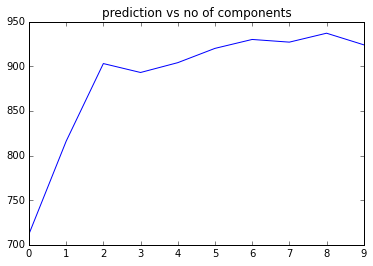

In [58]:
for i in range(1,11):
    model = PCA(n_components=i)
    trans = model.fit(X)
    Z = trans.transform(X)
    fit = gnb.fit(Z,y)
    pred = fit.predict(Z)
    predict_correct.append(confusion_matrix(pred,y).trace())
    print predict_correct

plt.plot(predict_correct)
plt.title("prediction vs no of components")
plt.show()

we are able to achieve almost same level of accuracy with 3 eigen vectors as 5 eigen vectors 